# **파이썬 딥러닝 텐서플로 CH3**

### **01. 딥러닝 준비**

1. 주요용어  
1) 하이퍼 파라미터: 사용자가 직접 설정해야 하는 값  
  -튜닝을 통해 예측 성능 높  
2) 과소적합 vs 과대적합  
  -예측할 데이터가 모델이 학습한 데이터와 다른 분포를 갖거나, 혹은 학습한 데이터가 특정 레이블에 편향된 데이터로 이루어져 있다면 예측성능 떨어지게 됨  
  -과대적합: 학습 데이터의 불필요한 노이즈까지 과도하게 반영하여, 예측 데이터에 예측 오차 발생 확률 커짐  
  -예측 데이터와 분포가 동일하게 구성해야 하며, 불필요한 노이즈는 데이터 분석 및 전처리를 통해 해소해야 함  
3) 에포크  
  -딥러닝은 데이터셋을 학습하는 과정을 여러 번 반복하면서 최적의 모델 가중치를 찾는 과정
  -딥러닝 모델이 반복 훈련을 할 때 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프 의미  
4) 손실함수  
  -예측 값과 정답 값의 차이 또는 오차(모델의 출력값과 실제 값과의 차이)
  -사용자가 분류/회귀 모델에 따라 다르게 적용  
  -지도학습의 분류  
    - 이진 분류: binary_crossentropy
    - 다중 분류(원핫 벡터): categorical_crossentropy  
    - 다중 분류(원핫 벡터X): sparse_categorical_crossentropy
    - (다중 분류에서는 출력층의 활성함수로 softmax 사용)

    - 회귀 모델: 평균제곱오차(MSE), 평균절대값오차(MAE). 후버

In [1]:
import tensorflow as tf

tf.keras.losses.BinaryCrossentropy()
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy>

  5) 경사하강법  
  -모델의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법  
  -딥러닝에서 경사하강법 알고리즘을 이용해 손실함수 값을 최소로 만드는 가중치 찾을 수 있음 

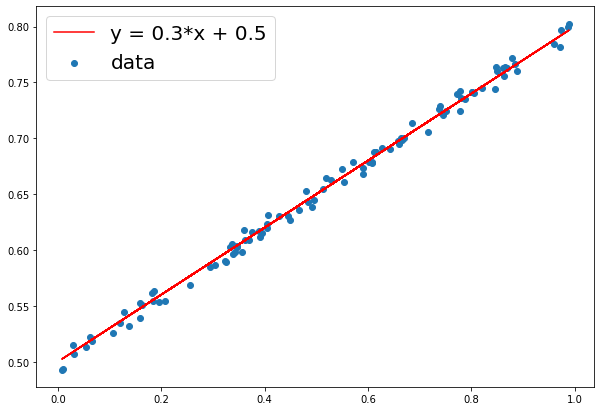

w: 0.3, b: 0.5


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
    x = np.random.rand(size)
    y = w * x + b
    noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
    yy = y + noise
    plt.figure(figsize=(10, 7))
    plt.plot(x, y, color='r', label=f'y = {w}*x + {b}')
    plt.scatter(x, yy, label='data')
    plt.legend(fontsize=20)
    plt.show()
    print(f'w: {w}, b: {b}')
    return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [4]:
num_epoch = 1000

learning_rate = 0.005

errors = []

w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):

    y_hat = w * x + b
    
    error = 0.5*((y_hat - y) ** 2).sum()
    if error < 0.005:
        break

    w = w - learning_rate * ((y_hat - y) * x).sum()
    b = b - learning_rate * (y_hat - y).sum()
    
    errors.append(error)

    if epoch % 5 == 0:
        print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch, w, b, error))
    
print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch, w, b, error))

 0 w = 0.47818, b = 0.38181 error = 0.29466
 5 w = 0.46226, b = 0.41101 error = 0.09942
10 w = 0.44106, b = 0.42270 error = 0.07489
15 w = 0.42265, b = 0.43275 error = 0.05650
20 w = 0.40672, b = 0.44145 error = 0.04271
25 w = 0.39293, b = 0.44898 error = 0.03238
30 w = 0.38099, b = 0.45550 error = 0.02463
35 w = 0.37065, b = 0.46114 error = 0.01883
40 w = 0.36170, b = 0.46603 error = 0.01448
45 w = 0.35395, b = 0.47026 error = 0.01121
50 w = 0.34723, b = 0.47392 error = 0.00877
55 w = 0.34142, b = 0.47710 error = 0.00693
60 w = 0.33639, b = 0.47984 error = 0.00556
------------------------------------------------------------
63 w = 0.3, b = 0.5 error = 0.00491


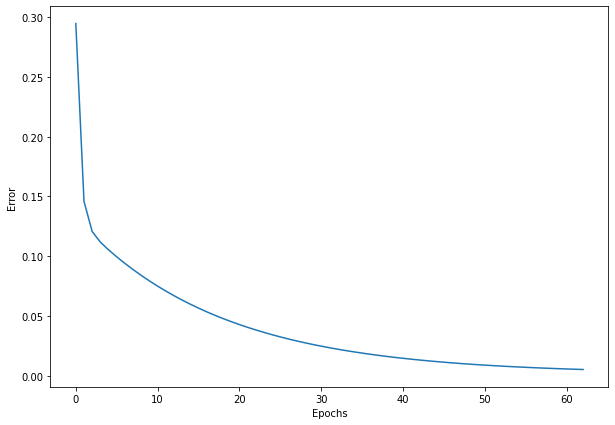

In [5]:
plt.figure(figsize=(10, 7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

**02. 딥러닝 프로세스**  
**;데이터 전처리>모델 생성/컴파일>훈련>검증>예측**

1. 데이터 전처리  
  -배열의 차원 조정하거나 스케일 조정

2. 모델 생성  
  <font color="blue">-Sequential API: 순차적인 구조의 모델  
  -Functional API/Model Subclassing: 다중입력/출력을 갖고 있는 복잡한 모델

3. 모델 컴파일  
  <font color="blue">-손실함수(loss), 옵티마이저, 평가지표(metrics) 정의  
  -모델 인스턴스에 compile 메소드를 적용하고, 위의 여러가지 속성 값 설정

4. 모델 훈련  
  <font color="blue">-fit()함수에 모델 훈련에 필요한 정보를 파라미터로 전달  
  -훈련/검증 데이터셋, epoch, 배치(batch) 크기 및 콜백(callback) 함수 등 지정  

5. 모델 검증
  -훈련이 완료된 모델 검증하는 단계  
  -평가 지표 계산  
  -결과를 바탕으로 다시 모델 생성 단계로 돌아가 모델 수정을 하고, 재평가하는 단계를 통해 목표 성능 도달  

6. 모델 예측  

### **02. 단순 신경망 훈련**

1. 선형회귀

2. 뉴런  
  -인공 신경망 모델을 구성하는 하나의 신경  
  -신경망은 여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성  
  -뉴런의 내부에는 가중치가 존재하고 모델이 훈련을 진행하면서 오차 역전파를 통해 뉴런의 가중치 업데이트  

3. Dense 레이어  
  <font color="blue">-심층 신경망 모델을 구성하는 가장 기본 레이어
  -완전 연결층: 모든 뉴런들이 정보(텐서)의 흐름을 나타내는 화살표로 연결  
  -Dense 레이어를 구성하는 노드 개수와 활성화 함수 지정할 수 있음


In [3]:
import tensorflow as tf

tf.keras.layers.Dense(10)
tf.keras.layers.Dense(10,activation='relu')

2-4. 데이터셋 만들기

In [4]:
import numpy as np

x = np.arange(1, 6)

y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


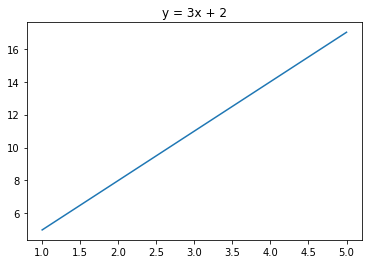

In [5]:
import matplotlib.pyplot as plt

plt.plot(x, y)
plt.title('y = 3x + 2')
plt.show()

2-5. Sequential API  
  -층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식  
  -입력 레이어부터 출력 레이어까지 순서를 갖고있음  
  -입력 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산 수행

<모델 생성>-1

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

<모델 생성>-2

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

**반드시 첫번째 층은 input_shape를 지정해야 함**

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[4]), 
    tf.keras.layers.Dense(5), 
    tf.keras.layers.Dense(1), 
])

<단순선형회귀 모델 정의>  
  -1개의 뉴런을 가지는 Dense 레이어 1개 사용  
  -뉴런은 기울기에 해당하는 w와 상수항에 해당하는 b를 매개변수로 가짐

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])           #x값을 나타내는 입력 변수 1개만 존재하기 때문         
])

<모델 요약>  
  -Trainable params: 모델 훈련 시 업데이트할 파라미터의 총 개수(단순선형회귀에서는 가중치 w, 편향 b로 2개)  
  -Non-trainable params: 훈련시 업데이트하지 않을 파라미터의 총 개수

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


<컴파일>  
  -옵티마이저, 손실함수, 평가지표 등 정의  
  <font color="blue">-3가지 방법으로 지정가능(클래스 인스턴스/함수/사전정의된 문자열)

In [13]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error', 
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [11]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [12]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005), 
              loss=tf.keras.losses.MeanAbsoluteError(), 
              metrics=[tf.keras.metrics.MeanAbsoluteError(), 
                       tf.keras.metrics.MeanSquaredError()
                       ])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


<훈련>  
  -가중치(weight) 텐서를 업데이트하는 과정  
  -훈련용 데이터셋의 입력(x), 정답에 해당하는 출력(y), 반복 훈련할 epoch 수 지정  
  -매 epoch가 끝날 때마다 훈련 데이터셋에 대한 손실과 평가지표 출력  
  -verbose=0 지정, 훈련 중간 과정 출력X

In [14]:
#컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

#훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 3s 3s/step - loss: 226.2429 - mae: 13.9472
Epoch 2/1200
1/1 [==============================] - 0s 8ms/step - loss: 131.8950 - mae: 10.6799
Epoch 3/1200
1/1 [==============================] - 0s 11ms/step - loss: 76.9134 - mae: 8.1855
Epoch 4/1200
1/1 [==============================] - 0s 7ms/step - loss: 44.8725 - mae: 6.2813
Epoch 5/1200
1/1 [==============================] - 0s 9ms/step - loss: 26.2003 - mae: 4.8275
Epoch 6/1200
1/1 [==============================] - 0s 9ms/step - loss: 15.3187 - mae: 3.7177
Epoch 7/1200
1/1 [==============================] - 0s 9ms/step - loss: 8.9771 - mae: 2.8703
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 5.2812 - mae: 2.2233
Epoch 9/1200
1/1 [==============================] - 0s 8ms/step - loss: 3.1271 - mae: 1.7293
Epoch 10/1200
1/1 [==============================] - 0s 8ms/step - loss: 1.8714 - mae: 1.3521
Epoch 11/1200
1/1 [==============================] - 0s 7ms

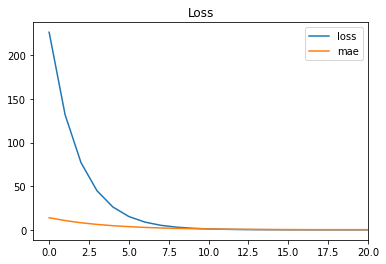

In [15]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
plt.xlim(-1, 20)
plt.title('Loss')
plt.legend()
plt.show()

<검증>

In [17]:
model.evaluate(x,y)

1/1 [==============================] - 0s 176ms/step - loss: 3.7283e-05 - mae: 0.0052


[3.7282879929989576e-05, 0.005241012666374445]

<예측>

In [18]:
model.predict([10])

array([[32.02533]], dtype=float32)

### **03. 심층 신경망으로 이미지 분류**


<데이터셋 로드>

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


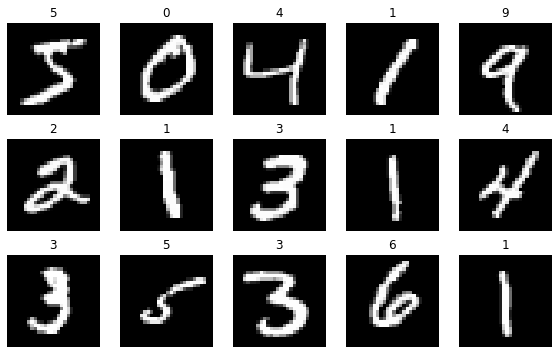

In [23]:
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(8, 5)

for i in range(15):
    ax = axes[i//5, i%5]
    # imshow로 이미지 시각화
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

<데이터 전처리>

In [6]:
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [7]:
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [26]:
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

<Flatten 레이어>  
-정규화를 하면 개별 데이터 값의 범위는 축소되지만, 원본 배열의 형태는 그대로 유지  
-<font color="blue">Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야함

In [27]:
print(f'변경전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000, -1).shape}')

변경전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


In [8]:
print(f'변경전 shape: {x_train.shape}')

#Flatten 레이어 적용
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


<활성화 함수>  
-입력을 비선형 출력으로 변환해주는 함수

In [9]:
tf.keras.layers.Dense(128, activation='relu')

별도의 층으로 적용 가능  
Dense 레이어 다음에 배치 정규화(Batch Normalization)을 적용한 후 활성화 함수 적용하고자 할 때 사용

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128), 
    tf.keras.layers.Activation('relu')
])

<입력과 출력>  
  -출력층: 분류 모델의 가장 마지막 레이어

<font color="blue"> mnist는 총 10개의 클래스로 이루어져 있기 때문에 마지막 출력층의 노드 개수는 10개가 되어야 함

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(256, activation='relu'), 
    tf.keras.layers.Dense(64, activation='relu'), 
    tf.keras.layers.Dense(32, activation='relu'), 
    
    tf.keras.layers.Dense(10, activation='softmax'), 
])

<font color="blue">-출력층 노드 = 1인 경우, sigmoid  
-출력층 노드 = 2개 이상인 경우, softmax

In [12]:
tf.keras.layers.Dense(1, activation='sigmoid')

tf.keras.layers.Dense(10, activation='softmax')

<손실함수>  
 <font color="blue"> -이진분류기: activation=sigmoid, loss=binary_crossentropy  
  -노드 개수 2개 이상: activation=softmax,loss=categorical_crossentropy(원핫벡터)/sparse_categorical_crossentropy(원핫벡터X)

In [13]:
model.compile(loss='binary_crossentropy')

In [14]:
model.compile(loss='categorical_crossentropy')

#mnist
model.compile(loss='sparse_categorical_crossentropy')

<옵티마이저>  
-손실을 낮추기 위해, 신경망의 가중치와 학습률 같은 신경망의 속성을 변경하는데 사용되는 최적화 방법  
-Adam 알고리즘 많이 사용, 대체적으로 좋은 성능  

-클래스 인스턴스나 문자열로 지정가능  
-문자열로 지정할 때에는, 이름 소문자로 표기  
-클래스 인스턴스로 지정할 때에는, 학습률 직접 설정 가능

In [15]:
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


<평가지표>

In [16]:
#클래스 인스턴스
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=[acc])

#문자열
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

<훈련>

In [17]:
model.fit(x_train, y_train, 
          validation_data=(x_test, y_test), 
          epochs=10, 
          )

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2340 - accuracy: 0.9306 - val_loss: 17.1714 - val_accuracy: 0.9656
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0961 - accuracy: 0.9701 - val_loss: 14.8299 - val_accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0685 - accuracy: 0.9787 - val_loss: 15.3136 - val_accuracy: 0.9694
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0504 - accuracy: 0.9844 - val_loss: 16.4736 - val_accuracy: 0.9760
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 15.6002 - val_accuracy: 0.9763
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0328 - accuracy: 0.9898 - val_loss: 19.1165 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0299 - accuracy: 0.9901 - val_loss: 18.1182 - val_ac

<평가>

In [18]:
test_loss, test_acc = model.evaluate(x_test,  y_test)

print('검증셋 정확도:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 23.6156 - accuracy: 0.9759
검증셋 정확도: 0.9758999943733215


<예측>

In [19]:
predictions = model.predict(x_test)

In [20]:
predictions[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [21]:
import numpy as np

print(np.argmax(predictions[0]))

print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 6 9]


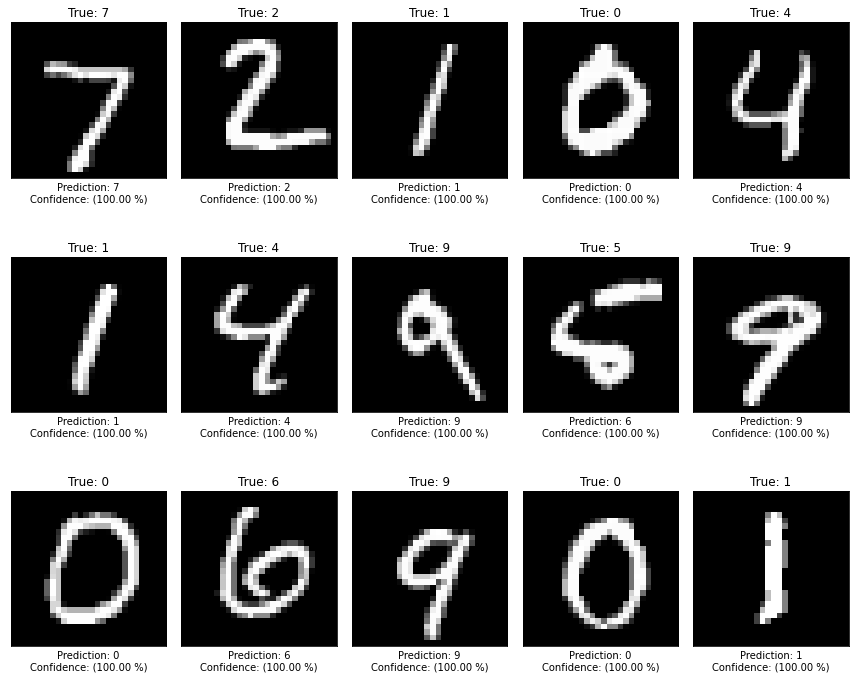

In [22]:
import matplotlib.pyplot as plt

def get_one_result(idx):
    img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
    return img, y_true, y_pred, confidence
    
fig, axes = plt.subplots(3, 5)
fig.set_size_inches(12, 10)

for i in range(15):
    ax = axes[i//5, i%5]

    img, y_true, y_pred, confidence = get_one_result(i)

    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'True: {y_true}')
    ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')

plt.tight_layout()
plt.show()

### **04. 모델 세부 설정**

1.

In [24]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

x_train = x_train / x_train.max()
x_test = x_test / x_test.max()

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


<초기값 설정>

In [25]:
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [26]:
#문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

In [27]:
#클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'HeNormal', 'config': {'seed': None}}

<규제>  
-모델의 과대적합 해소하기 위해 L1, L2 규제 적용  
-별도 설정 필요

In [28]:
#기본값 확인
dense = tf.keras.layers.Dense(256, activation='relu')
dense.get_config()

{'activation': 'relu',
 'activity_regularizer': None,
 'bias_constraint': None,
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'bias_regularizer': None,
 'dtype': 'float32',
 'kernel_constraint': None,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'kernel_regularizer': None,
 'name': 'dense_11',
 'trainable': True,
 'units': 256,
 'use_bias': True}

In [29]:
#L1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha 값 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


<드롭아웃>   
-노드 신호의 일부를 임의로 삭제해 모델의 과대적합 방지  
-모델이 학습하는 가중치 파라미터의 개수 현저히 줄기 때문  
-모델이 훈련할 때는 드롭아웃이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들 활용

In [30]:
# 25%의 노드 삭제
tf.keras.layers.Dropout(0.25)

<배치 정규화(Batch Normalization>  
-각 층에서 활성화 함수를 통과하기 전 미니 배치의 스케일 정규화  
-보다 안정적인 훈련 가능, 성능 향상

In [31]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 64)                50240     
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),
    # 배치정규화
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 > 활성화 함수
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치정규화 
    tf.keras.layers.BatchNormalization(),
    # 배치정규화 > 활성화 함수
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_18 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_1 (Batc  (None, 32)               128       
 hNormalization)                                      

<활성화(Activation) 함수>

In [33]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2 로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [34]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64),

    # 배치정규화
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(32),
    # 배치정규화
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU, alpha=0.2
    tf.keras.layers.LeakyReLU(alpha=0.2),

    tf.keras.layers.Dense(10, activation='softmax'),
])

model_c.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_20 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

In [35]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train, 
                        validation_data=(x_test, y_test), 
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2968 - accuracy: 0.9158 - val_loss: 0.1662 - val_accuracy: 0.9477
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1354 - accuracy: 0.9590 - val_loss: 0.1165 - val_accuracy: 0.9655
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0998 - accuracy: 0.9699 - val_loss: 0.1058 - val_accuracy: 0.9664
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0811 - accuracy: 0.9747 - val_loss: 0.0984 - val_accuracy: 0.9682
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0668 - accuracy: 0.9794 - val_loss: 0.0994 - val_accuracy: 0.9695
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0567 - accuracy: 0.9821 - val_loss: 0.0877 - val_accuracy: 0.9730
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0476 - accuracy: 0.9845 - val_loss: 0.0868 - val_accuracy:

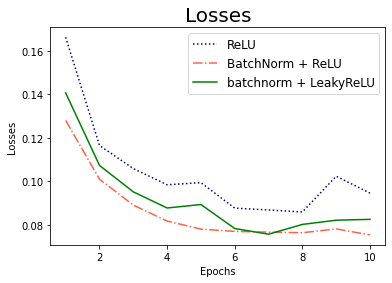

In [36]:
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU','batchnorm + LeakyReLU'], fontsize=12)
plt.show()